In [40]:
import numpy as np
import pandas as pd
import seaborn as snb
import matplotlib.pyplot as plt

In [41]:
data = pd.read_csv("Salary_Data.csv")

In [42]:
data.head()
#target varible = salary

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [43]:
data.shape

(30, 2)

In [44]:
data.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [45]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [46]:
#checking for null values
data.isnull().any()

YearsExperience    False
Salary             False
dtype: bool

In [47]:
data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [48]:
#separation of dependent and independent variable
#salary dependent varible therefore grabbing experience
# x = experience y =salary
x=data.iloc[:,:1]

In [49]:
#should be dataframe
x

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [50]:
y = data["Salary"]

In [51]:
y.head()
#should be 1d array

0    39343.0
1    46205.0
2    37731.0
3    43525.0
4    39891.0
Name: Salary, dtype: float64

In [52]:
type(y)

pandas.core.series.Series

Text(0, 0.5, 'y')

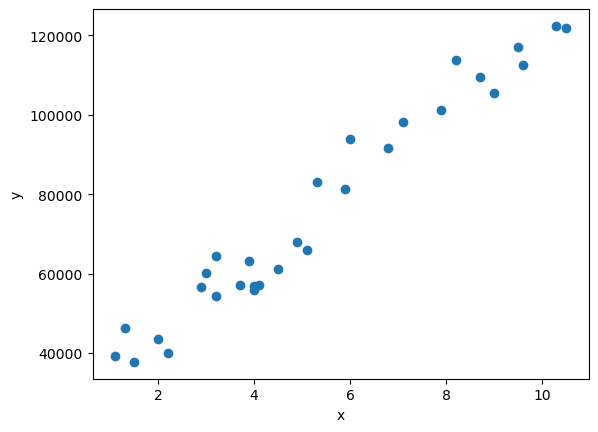

In [53]:
plt.scatter(x,y)
plt.xlabel("x")
plt.ylabel("y")

In [54]:
#splitting Data into training and testing data
from sklearn.model_selection import train_test_split

In [57]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state = 0)

In [58]:
x_train

,YearsExperience
27,9.6
11,4.0
17,5.3
22,7.9
5,2.9
16,5.1
8,3.2
14,4.5
23,8.2
20,6.8


In [59]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(24, 1)
(6, 1)
(24,)
(6,)


# MODEL BUILDING (PREPROCESSING DONE)

In [61]:
from sklearn.linear_model import LinearRegression

In [62]:
lr = LinearRegression()

In [63]:
lr.fit(x_train,y_train)

LinearRegression()

In [65]:
lr.coef_

array([9312.57512673])

In [66]:
lr.intercept_

26780.09915062818

# Test the MODEL

In [68]:
y_pred = lr.predict(x_test)

In [69]:
y_pred

array([ 40748.96184072, 122699.62295594,  64961.65717022,  63099.14214487,
       115249.56285456, 107799.50275317])

In [70]:
y_test

2      37731.0
28    122391.0
13     57081.0
10     63218.0
26    116969.0
24    109431.0
Name: Salary, dtype: float64


# Evaluation Of MODEL

In [71]:
from sklearn.metrics import r2_score

In [72]:
r2_score(y_test,y_pred)

0.988169515729126

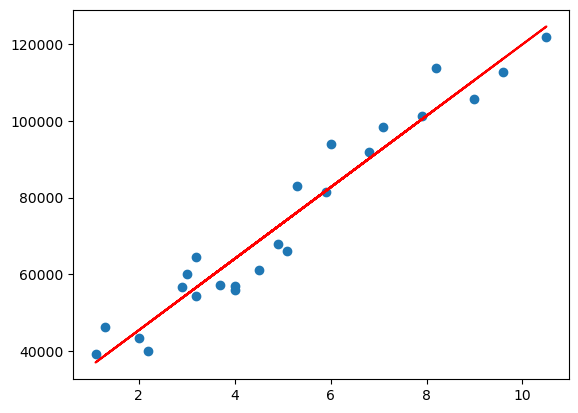

In [74]:
plt.scatter(x_train,y_train)
plt.plot(x_train,lr.predict(x_train),color='r')

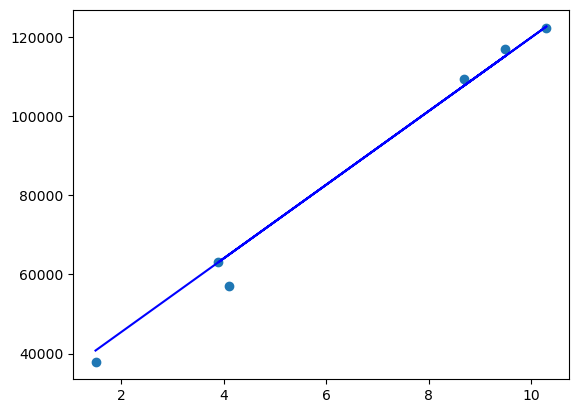

In [79]:
plt.scatter(x_test,y_test)
plt.plot(x_test,lr.predict(x_test),color='b')

In [82]:
#what  salary a person with 8 years of experience will get
lr.predict([[8]])

/Users/taeefmemon/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([101280.70016446])